Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.7331 - loss: 0.7435 - val_accuracy: 0.8812 - val_loss: 0.3227
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.8765 - loss: 0.3428 - val_accuracy: 0.9025 - val_loss: 0.2657
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8951 - loss: 0.2930 - val_accuracy: 0.9020 - val_loss: 0.2744
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9088 - loss: 0.2648 - val_accuracy: 0.9109 - val_loss: 0.2558
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9108 - loss: 0.2565 - val_accuracy: 0.9128 - val_loss: 0.2505
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.9147 - loss: 0.2532 - val_accuracy: 0.9119 - val_loss: 0.2474
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.9146 - loss: 0.2490 - val_accuracy: 0.9087 - val_loss: 0.2519


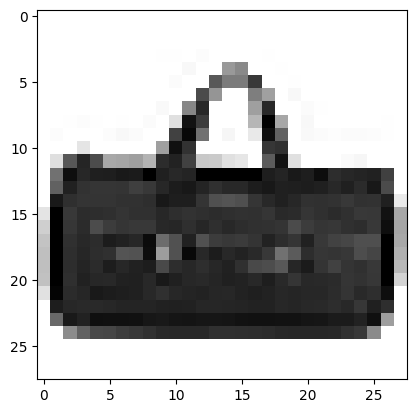

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[1.1053669e-12 2.9837573e-19 1.0843155e-13 2.1817797e-13 3.4700476e-13
  1.0413580e-11 2.1256772e-13 8.9363733e-12 1.0000000e+00 1.5781091e-13]]
가방


In [ ]:
#라이브러리 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


#데이터 전처리
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data() #훈련 데이터와 테스트 데이터로 분할

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #데이터 정규화

train_scaled, val_scaled, train_target, val_target = train_test_split( #훈련 데이터 내에서 훈련 데이터와 검증 데이터로 분할
    train_scaled, train_target, test_size=0.2, random_state=42)


#모델 생성
model = keras.Sequential() #모델 순차적으로 쌓음
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #합성곱층
model.add(keras.layers.MaxPooling2D(2)) #풀링층
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten()) #2차원 데이터 1차원으로 펴기
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) #40%의 뉴런 무작위로 드롭하여 과적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) #10개 클래스 예측


#모델 학습
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) #모델 컴파일
history = model.fit(train_scaled, train_target, epochs=7, validation_data=(val_scaled, val_target)) #모델 학습


#이미지 시각화
plt.imshow(val_scaled[4].reshape(28, 28), cmap='gray_r')
plt.show()

#이미지 클래스일 확률 표시
preds = model.predict(val_scaled[4:5])
print(preds)

#이미지 예측 클래스
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(preds)])